# 💰 Financial Risk Classification Using Ensemble Models

This project demonstrates how to classify financial loan default risk using ensemble classifiers (Random Forest, AdaBoost, Gradient Boosting). We also perform EDA and visualize relationships in the data.

In [19]:
# 📦 Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings('ignore')
import statsmodels.api as sma

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [20]:
# 📥 Load Dataset
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/GermanCredit.csv')
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,... < 100 DM,6,critical account/other credits existing,domestic appliances,1169,unknown/no savings account,... >= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee/official,1,yes,yes,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee/official,1,no,yes,0
2,no checking account,12,critical account/other credits existing,retraining,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,no,yes,1
3,... < 100 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,...,building society savings agreement/life insurance,45,none,for free,1,skilled employee/official,2,no,yes,1
4,... < 100 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,...,unknown/no property,53,none,for free,2,skilled employee/official,2,no,yes,0


## 🧼 Preprocessing & Exploration

In [21]:
# Overview
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   int64 
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   int64 
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

,duration,amount,installment_rate,present_residence,age,number_credits,people_liable,credit_risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.700000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


In [22]:
# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

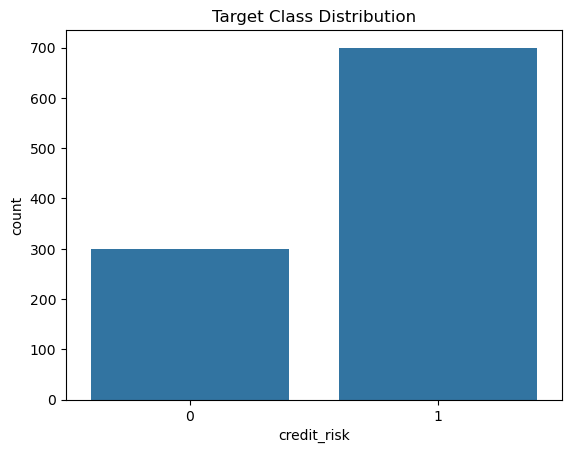

In [23]:
# 🎯 Target Distribution
sns.countplot(x='credit_risk', data=df)
plt.title('Target Class Distribution')
plt.show()

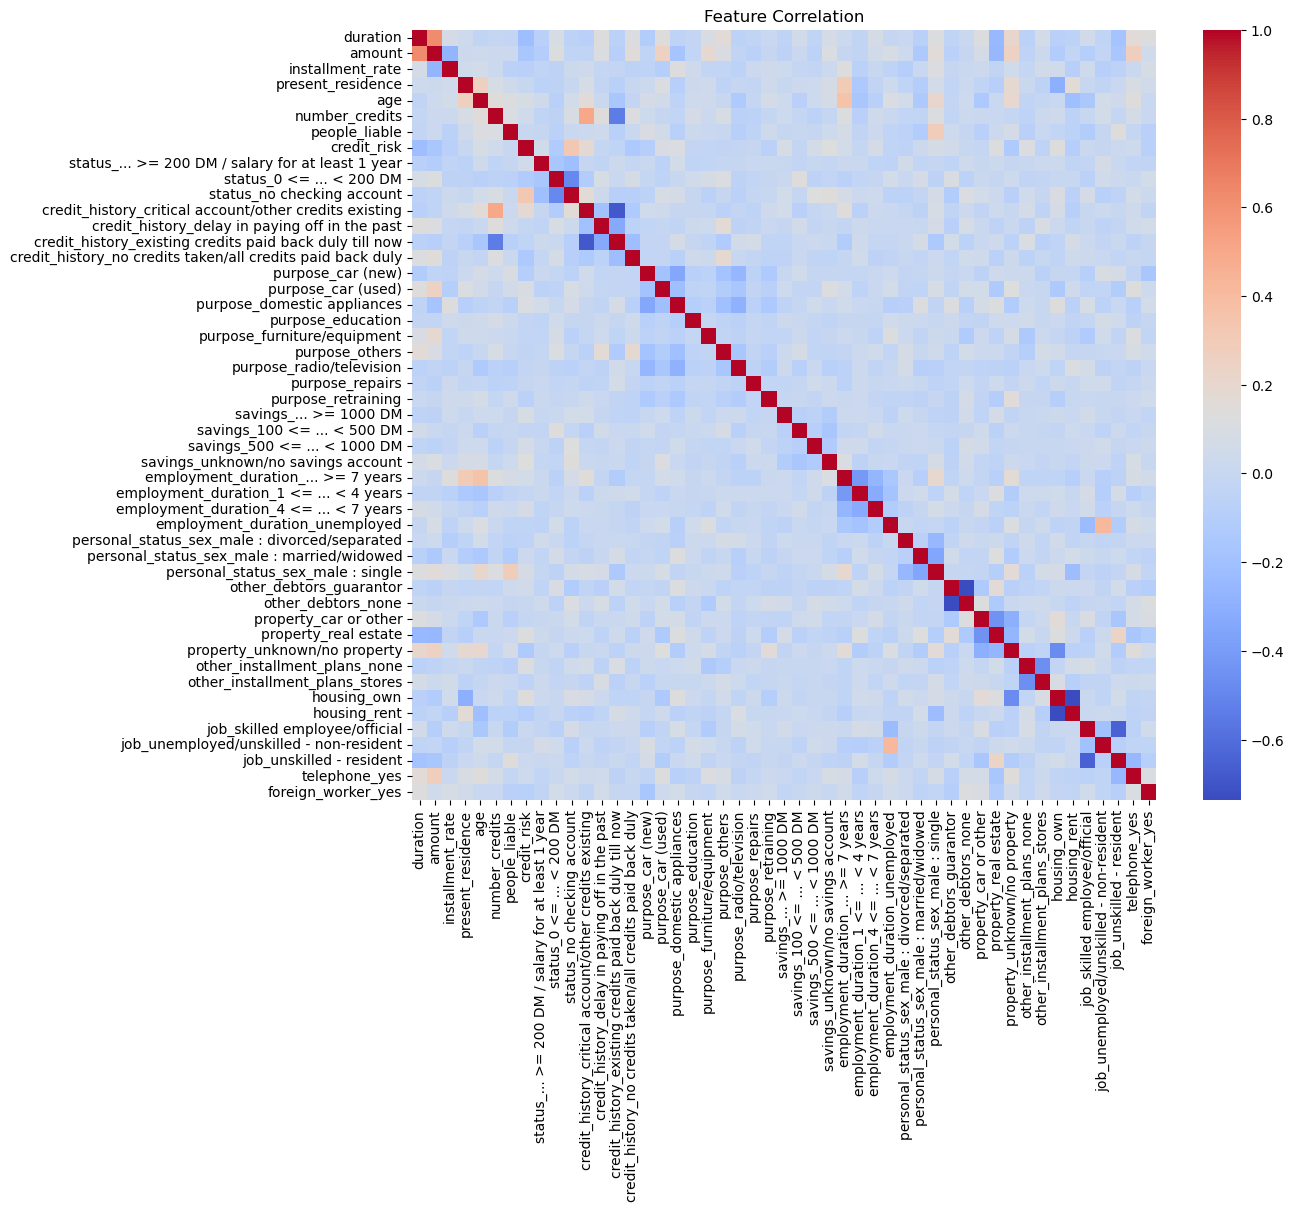

In [24]:
# 🔍 Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation')
plt.show()

## 📊 Modeling

In [26]:
# Split features and target
X = df.drop('credit_risk', axis=1)
y = df['credit_risk']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.37      0.48        91
           1       0.77      0.91      0.84       209

    accuracy                           0.75       300
   macro avg       0.71      0.64      0.66       300
weighted avg       0.73      0.75      0.73       300



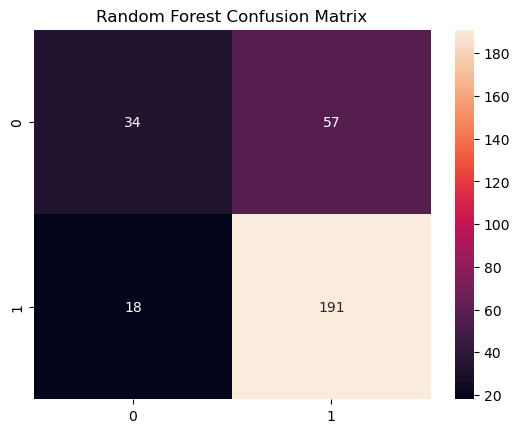

In [27]:
# 🌲 Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print('Random Forest Classification Report:')
print(classification_report(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')
plt.title('Random Forest Confusion Matrix')
plt.show()

AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.37      0.45        91
           1       0.76      0.87      0.81       209

    accuracy                           0.72       300
   macro avg       0.66      0.62      0.63       300
weighted avg       0.70      0.72      0.70       300



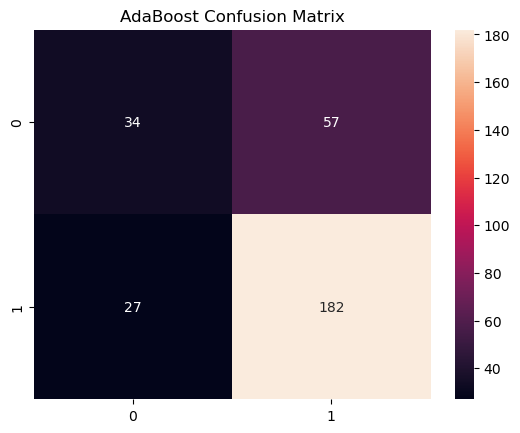

In [28]:
# 🚀 AdaBoost
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train_scaled, y_train)
y_pred_ada = ada.predict(X_test_scaled)

print('AdaBoost Classification Report:')
print(classification_report(y_test, y_pred_ada))
sns.heatmap(confusion_matrix(y_test, y_pred_ada), annot=True, fmt='d')
plt.title('AdaBoost Confusion Matrix')
plt.show()

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.35      0.45        91
           1       0.76      0.91      0.83       209

    accuracy                           0.74       300
   macro avg       0.70      0.63      0.64       300
weighted avg       0.73      0.74      0.72       300



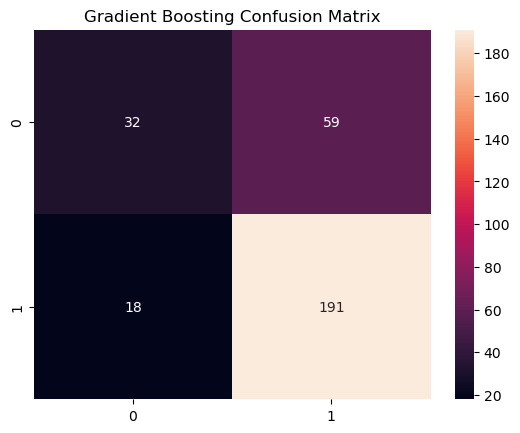

In [29]:
# 🔥 Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)

print('Gradient Boosting Classification Report:')
print(classification_report(y_test, y_pred_gb))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

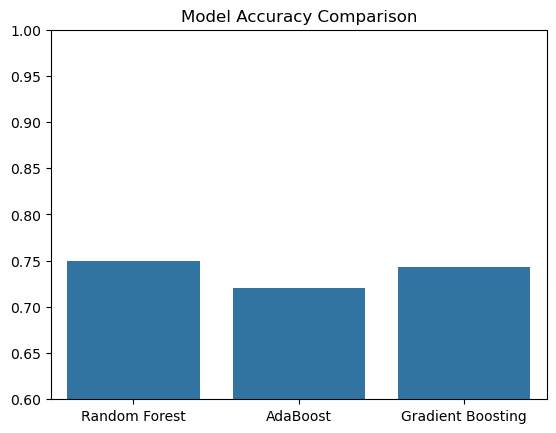

In [30]:
# 📈 Model Comparison
models = ['Random Forest', 'AdaBoost', 'Gradient Boosting']
accuracies = [rf.score(X_test_scaled, y_test), ada.score(X_test_scaled, y_test), gb.score(X_test_scaled, y_test)]

sns.barplot(x=models, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylim(0.6, 1.0)
plt.show()